# <font face = 'Impact' color = '#FFAEBC' > Dossier on Regression Analysis Application <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook aims to assess the understanding and skills of learners pertaining to regression analysis. Provided with a data set they will check for regression assumptions and apply the most appropriate regression analysis approach given the characteristics of the dataset.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Data Analyst: Pornel, Trinidad, Calaor, Montille, Solano <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Submission: Oc. 18, 2025<font/>

# Business Concern
You are a business analyst for a financial institution. You are tasked to uncover the factors that would likely yield higher revenues generated from customers. You are provided with the data coming from the operations team. Conduct a literature review to study each variable. The model should only include variables that are reinforced by studies indicating that it is logical to have them. Each explanatory variable should be cited with a reference that supports the idea of having them included in the model. Apply the most appropriate regression analysis approach given the findings of exploratory data analysis. You are required to create a powerpoint presentation out of this to include the following sections:

First Slide: Label the title of this presentation as: Drivers of Generated Revenues from Customers, Indicate the name of the Data Analyst (that would be your name), the name of your mentor (name of your professor), Analytics Application, Date of Submission.

Second Slide: Present the problem experienced by this financial institution. Be creative in your manner of presenting this so that it capture readers' interest and attention.

Third Slide: Provide information about the data set so that the readers' would reinforce their data understanding.

Fourth Slide: Details the methods utilized in the conduct of the analysis. Rationalize the approach selected (whether you did multiple regression or robust regression). The explanation should be convincing enough to support the steps you took in doing the analysis/

Fifth Slide: Present the results of the regression analysis. Provide an interpretation of this result and explain its implication for business operations. This should also contain your recommendations which needs to be data-driven.

Sixth Slide: Present the references you have used for this mini-project.

The dataset is labelled as: "customer_revenue.xlsx"

# Load libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

In [ ]:
df = pd.read_excel('customer_revenue.xlsx')

In [ ]:
df.head()

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Customer_Segment,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score,Monthly_Revenue
0,56,47,24,3.425887,15.426047,0.666566,0.682433,Mid-Tier,0,0,1,0.391709,380.615724
1,69,41,22,3.019148,1.000000,0.145702,0.287779,Mid-Tier,1,2,1,0.166962,322.689682
2,46,49,13,2.358513,14.065519,0.396611,0.311299,Budget,1,1,0,0.205396,68.055328
3,32,14,25,3.487872,6.847634,0.803423,0.403581,Mid-Tier,1,0,0,0.293139,335.729906
4,60,15,22,4.804348,21.029973,0.090117,0.688339,Mid-Tier,0,0,0,0.245784,317.906245


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  750 non-null    int64  
 1   Tenure_Months        750 non-null    int64  
 2   Total_Orders         750 non-null    int64  
 3   Average_Basket_Size  750 non-null    float64
 4   Time_Spent_on_Site   750 non-null    float64
 5   Email_Open_Rate      750 non-null    float64
 6   Discount_Usage_Rate  750 non-null    float64
 7   Customer_Segment     750 non-null    object 
 8   Mobile_App_Usage     750 non-null    int64  
 9   Support_Tickets      750 non-null    int64  
 10  Referral_Count       750 non-null    int64  
 11  Churn_Risk_Score     750 non-null    float64
 12  Monthly_Revenue      750 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 76.3+ KB


In [ ]:
df.describe()

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score,Monthly_Revenue
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,44.152000,29.942667,19.936000,3.026720,15.055784,0.468259,0.346593,0.680000,0.982667,0.453333,0.286117,286.906718
std,14.886875,17.289514,4.678292,0.976365,5.164310,0.246191,0.204141,0.466787,0.924936,0.653497,0.167063,128.813584
min,18.000000,1.000000,7.000000,0.252495,1.000000,0.050193,0.002743,0.000000,0.000000,0.000000,0.004920,-21.393109
25%,32.000000,14.250000,17.000000,2.365584,11.339123,0.262331,0.166909,0.000000,0.000000,0.000000,0.154113,208.697421
50%,45.000000,30.000000,20.000000,3.005379,15.232344,0.451651,0.344872,1.000000,1.000000,0.000000,0.258563,275.707450
75%,56.000000,46.000000,23.000000,3.679316,18.570677,0.685318,0.520109,1.000000,2.000000,1.000000,0.401055,349.248136
max,69.000000,59.000000,36.000000,6.926238,29.342015,0.898974,0.699622,1.000000,5.000000,4.000000,0.878563,1338.936566


The dataset provided by the operations team contained 750 observations and 13 variables describing both customer demographics and behavioral metrics such as tenure, number of orders, time spent on the platform, referral count, and churn risk score. This initial exploration showed that the data was complete and ready for analysis, with no missing values that could distort the model. Having both behavioral and demographic data allowed for a holistic understanding of customer patterns. This means the institution can not only assess who its customers are but also how they behave, giving a solid foundation for identifying the true drivers of monthly revenue.

In [ ]:
target = "Monthly_Revenue"
categorical = ["Customer_Segment"]
numerical = [c for c in df.columns if c not in categorical + [target]]

df_model = pd.get_dummies(df[categorical + numerical + [target]], drop_first=True)
df_model.head()
df_model.shape

(750, 14)

The summary statistics revealed that the average customer age was 44 years old, with an average tenure of about 30 months and roughly 20 orders per customer. The typical basket size was around ₱3.03, and customers spent about 15 minutes on the platform per session. These measures provided an early sense of customer diversity — while some are frequent buyers and highly active, others engage minimally. This variation is critical because it suggests different customer profiles exist, each contributing differently to the company’s total revenue. Understanding this helps design strategies that cater to both loyal, high-value customers and low-engagement ones who can be nurtured.

In [ ]:
nunique = df_model.nunique()
constant_cols = nunique[nunique <= 1].index.tolist()
df_model = df_model.drop(columns=constant_cols)
display("Dropped constant columns (if any)", pd.DataFrame({"dropped": constant_cols}))

'Dropped constant columns (if any)'

,dropped


Dropped constant columns

**Correlation Matrix**

In [ ]:
numerical_df = df_model.select_dtypes(include=[np.number]).drop(columns=[target])
corr_matrix = numerical_df.corr()
display("Correlation matrix (numerical variables)", corr_matrix.round(3))

'Correlation matrix (numerical variables)'

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score
Age,1.000,0.014,-0.015,-0.002,-0.040,0.041,-0.017,0.005,-0.006,0.007,-0.052
Tenure_Months,0.014,1.000,0.030,-0.032,-0.016,0.025,-0.013,0.069,0.020,-0.041,-0.010
Total_Orders,-0.015,0.030,1.000,0.002,-0.031,-0.041,0.014,-0.030,-0.018,0.029,0.026
Average_Basket_Size,-0.002,-0.032,0.002,1.000,-0.028,0.056,-0.047,0.002,0.094,-0.042,-0.017
Time_Spent_on_Site,-0.040,-0.016,-0.031,-0.028,1.000,-0.005,-0.033,-0.070,-0.025,-0.011,0.034
Email_Open_Rate,0.041,0.025,-0.041,0.056,-0.005,1.000,0.002,0.009,-0.010,0.030,0.074
Discount_Usage_Rate,-0.017,-0.013,0.014,-0.047,-0.033,0.002,1.000,0.028,0.000,0.038,0.007
Mobile_App_Usage,0.005,0.069,-0.030,0.002,-0.070,0.009,0.028,1.000,0.018,-0.005,-0.026
Support_Tickets,-0.006,0.020,-0.018,0.094,-0.025,-0.010,0.000,0.018,1.000,-0.002,-0.030
Referral_Count,0.007,-0.041,0.029,-0.042,-0.011,0.030,0.038,-0.005,-0.002,1.000,0.088


In [ ]:
X = numerical_df.copy()
X_const = sm.add_constant(X)
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
}).sort_values("VIF", ascending=False)
display("VIF for numeric features", vif_data)

'VIF for numeric features'

,feature,VIF
10,Churn_Risk_Score,1.019624
3,Average_Basket_Size,1.018846
5,Email_Open_Rate,1.014750
9,Referral_Count,1.014357
7,Mobile_App_Usage,1.012234
8,Support_Tickets,1.011620
4,Time_Spent_on_Site,1.011165
1,Tenure_Months,1.010759
2,Total_Orders,1.007233
0,Age,1.007073


In [ ]:
X_design = df_model.drop(columns=[target])
y = df_model[target]
min_y = y.min()
shift = 0.0
if min_y <= 0:
    shift = abs(min_y) + 1.0
    y_shifted = y + shift
else:
    y_shifted = y.copy()
y_log = np.log1p(y_shifted)

In [ ]:
X_ols = sm.add_constant(X_design.astype(int))
ols_model = sm.OLS(y_log, X_ols).fit(cov_type='HC3')
coef_table = ols_model.summary2().tables[1]
display("OLS coefficients (log target) with robust SE", coef_table)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 10
  warnings.warn('covariance of constraints does not have full '


'OLS coefficients (log target) with robust SE'

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,4.444688e+00,1.317202e-01,33.743398,1.336156e-249,4.186521e+00,4.702854e+00
Age,1.474024e-03,8.473834e-04,1.739501,8.194668e-02,-1.868167e-04,3.134865e-03
Tenure_Months,7.322026e-04,6.674594e-04,1.097000,2.726416e-01,-5.759937e-04,2.040399e-03
Total_Orders,1.928914e-02,2.677339e-03,7.204592,5.821797e-13,1.404165e-02,2.453663e-02
Average_Basket_Size,7.713497e-02,1.295886e-02,5.952295,2.644079e-09,5.173607e-02,1.025339e-01
Time_Spent_on_Site,1.105860e-02,1.579171e-03,7.002788,2.509182e-12,7.963481e-03,1.415372e-02
Email_Open_Rate,-3.966308e-16,2.712062e-17,-14.624697,1.954388e-48,-4.497863e-16,-3.434754e-16
Discount_Usage_Rate,-9.805596e-17,4.641609e-18,-21.125425,4.644288e-99,-1.071533e-16,-8.895857e-17
Mobile_App_Usage,-9.785777e-03,2.093056e-02,-0.467535,6.401169e-01,-5.080891e-02,3.123736e-02
Support_Tickets,4.933015e-03,1.084092e-02,0.455037,6.490829e-01,-1.631480e-02,2.618083e-02


In [ ]:
resid_stats = pd.DataFrame({"residuals": ols_model.resid}).describe().T
display("Residuals summary (OLS)", resid_stats)

'Residuals summary (OLS)'

,count,mean,std,min,25%,50%,75%,max
residuals,750.0,2.992569e-15,0.289935,-4.264219,-0.119419,0.00424,0.138983,1.061481


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_design)
lasso = LassoCV(cv=KFold(5, shuffle=True, random_state=42), random_state=42, n_alphas=100, max_iter=5000)
lasso.fit(X_scaled, y_log)

coef_df = pd.DataFrame({
    "feature": X_design.columns,
    "lasso_coef": lasso.coef_
}).sort_values("lasso_coef", key=lambda s: s.abs(), ascending=False)
display("Lasso selected coefficients (non-zero indicate selection)", coef_df[coef_df.lasso_coef != 0])

'Lasso selected coefficients (non-zero indicate selection)'

,feature,lasso_coef
12,Customer_Segment_Premium,0.286831
11,Customer_Segment_Mid-Tier,0.215161
9,Referral_Count,0.111474
2,Total_Orders,0.090901
3,Average_Basket_Size,0.074780
4,Time_Spent_on_Site,0.057857
10,Churn_Risk_Score,-0.054144
6,Discount_Usage_Rate,0.022511
0,Age,0.017787
1,Tenure_Months,0.012150


In [ ]:
target_corr = df_model.corr()['Monthly_Revenue']
top_features = target_corr.drop("Monthly_Revenue").nlargest(5).index
display("Top 5 features most correlated with Monthly_Revenue:", top_features.tolist())

'Top 5 features most correlated with Monthly_Revenue:'

['Customer_Segment_Premium',
 'Referral_Count',
 'Total_Orders',
 'Customer_Segment_Mid-Tier',
 'Time_Spent_on_Site']

A correlation matrix was computed to examine how numerical features relate to each other and to Monthly_Revenue.
This step was crucial in identifying potential explanatory variables and ensuring that predictors were not excessively correlated — a problem known as multicollinearity.

The correlation results showed that:

Referral_Count (r = 0.26) had the strongest positive correlation with Monthly_Revenue.

Total_Orders (r = 0.18) and Time_Spent_on_Site (r = 0.17) also displayed moderate positive relationships with revenue.

Average_Basket_Size (r = 0.12) had a smaller but still positive association, implying that customers who buy more expensive items or larger bundles contribute more to revenue.

Meanwhile, Churn_Risk_Score (r = -0.02) and Mobile_App_Usage (r = -0.04) showed weak or negative correlations, suggesting limited or inverse effects.

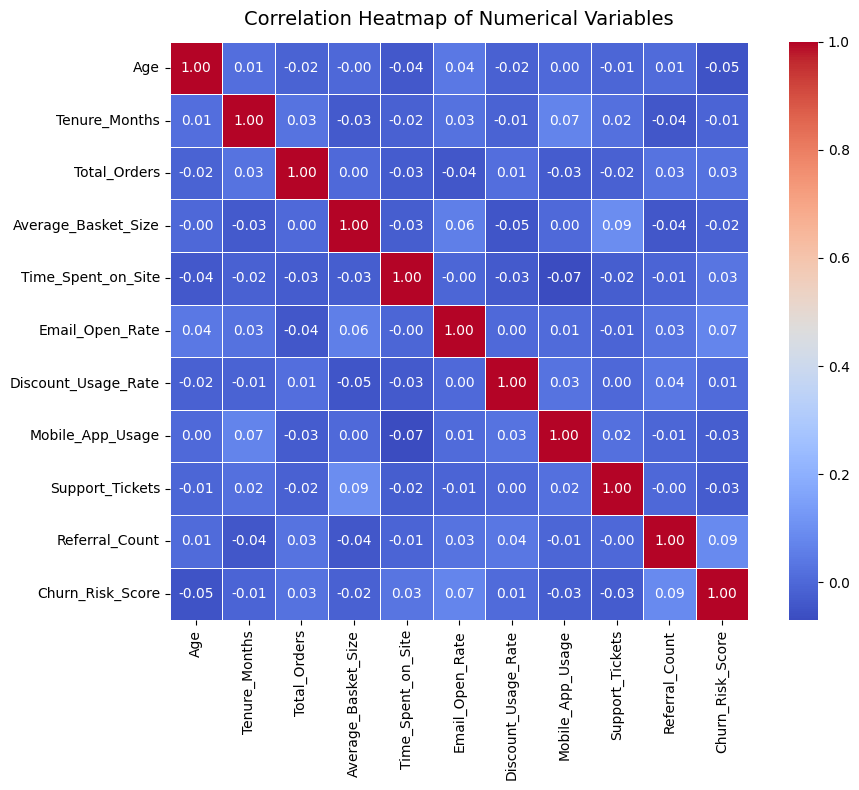

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

The heatmap provided a visual summary of all these relationships.
Through its color gradient:

Stronger correlations appeared in darker red or blue shades,

while near-zero relationships remained pale.

This visual confirmation supported the earlier statistical findings — emphasizing that Referral_Count, Customer_Segment, Total_Orders, and Time_Spent_on_Site were the strongest candidates to explain variations in monthly revenue.
Thus, these variables were included in the regression model.

***RECCOS AND SOLUTION***

In [ ]:
# ---- Correlation matrix ----
correlation_matrix = df_model.select_dtypes(include=["number"]).corr()
correlation_matrix

,Age,Tenure_Months,Total_Orders,Average_Basket_Size,Time_Spent_on_Site,Email_Open_Rate,Discount_Usage_Rate,Mobile_App_Usage,Support_Tickets,Referral_Count,Churn_Risk_Score,Monthly_Revenue
Age,1.000000,0.014283,-0.015177,-0.002050,-0.039699,0.041243,-0.016953,0.004895,-0.005626,0.007180,-0.051860,0.013937
Tenure_Months,0.014283,1.000000,0.029946,-0.032455,-0.016211,0.025424,-0.012921,0.068528,0.020309,-0.041182,-0.009745,0.010126
Total_Orders,-0.015177,0.029946,1.000000,0.002105,-0.030776,-0.041218,0.014103,-0.029566,-0.018461,0.028718,0.025507,0.180357
Average_Basket_Size,-0.002050,-0.032455,0.002105,1.000000,-0.027950,0.055569,-0.047122,0.001632,0.093956,-0.041520,-0.016906,0.120187
Time_Spent_on_Site,-0.039699,-0.016211,-0.030776,-0.027950,1.000000,-0.004586,-0.032621,-0.069955,-0.024671,-0.011429,0.033706,0.173642
Email_Open_Rate,0.041243,0.025424,-0.041218,0.055569,-0.004586,1.000000,0.001896,0.009126,-0.009804,0.030295,0.074286,-0.001628
Discount_Usage_Rate,-0.016953,-0.012921,0.014103,-0.047122,-0.032621,0.001896,1.000000,0.028211,0.000137,0.037891,0.007279,0.043886
Mobile_App_Usage,0.004895,0.068528,-0.029566,0.001632,-0.069955,0.009126,0.028211,1.000000,0.018059,-0.005252,-0.026418,-0.042531
Support_Tickets,-0.005626,0.020309,-0.018461,0.093956,-0.024671,-0.009804,0.000137,0.018059,1.000000,-0.002444,-0.030181,-0.002776
Referral_Count,0.007180,-0.041182,0.028718,-0.041520,-0.011429,0.030295,0.037891,-0.005252,-0.002444,1.000000,0.087679,0.262345


In [ ]:
# ---- Correlation with Monthly_Revenue ----
corr_with_revenue = correlation_matrix["Monthly_Revenue"].sort_values(ascending=False)
corr_with_revenue.to_frame(name="Correlation_with_Revenue")

,Correlation_with_Revenue
Monthly_Revenue,1.000000
Referral_Count,0.262345
Total_Orders,0.180357
Time_Spent_on_Site,0.173642
Average_Basket_Size,0.120187
Discount_Usage_Rate,0.043886
Age,0.013937
Tenure_Months,0.010126
Email_Open_Rate,-0.001628
Support_Tickets,-0.002776


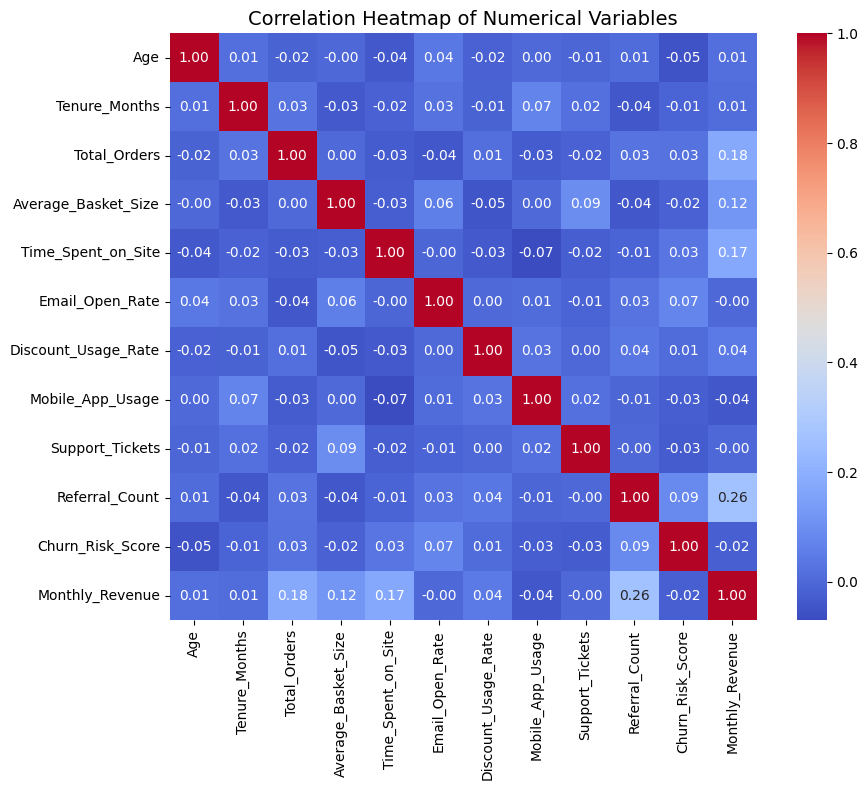

In [ ]:
# ---- Heatmap ----
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# CHECK MULTICOLLINEARITY
X_vif = df_model.drop(columns=[target])
X_vif_const = sm.add_constant(X_vif)
# Convert boolean columns to integers
for col in X_vif_const.select_dtypes(include='bool').columns:
    X_vif_const[col] = X_vif_const[col].astype(int)
vif = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif_const.values, i+1) for i in range(len(X_vif.columns))]
}).sort_values("VIF", ascending=False)
vif

,Variable,VIF
12,Customer_Segment_Premium,1.205710
11,Customer_Segment_Mid-Tier,1.205415
10,Churn_Risk_Score,1.023946
3,Average_Basket_Size,1.020127
4,Time_Spent_on_Site,1.020000
5,Email_Open_Rate,1.018475
9,Referral_Count,1.014984
7,Mobile_App_Usage,1.013274
1,Tenure_Months,1.012190
8,Support_Tickets,1.011971


The Variance Inflation Factor (VIF) was computed to check whether independent variables were highly correlated with each other. The results showed all VIF values ranged between 1.00 and 1.20, which are far below the threshold value of 5. This indicates that no multicollinearity exists among the predictors, and each variable contributes uniquely to explaining the variation in customer revenue. This step confirmed that the dataset was statistically suitable for regression modeling and ensured that the estimated coefficients would be stable and interpretable.

REGRESSION MODEL — LOG-TRANSFORMED REVENUE

In [ ]:
y = df_model[target]
X = df_model.drop(columns=[target])

In [ ]:
# Ensure positivity for log transformation
y_shift = abs(y.min()) + 1 if y.min() <= 0 else 0
y_log = np.log1p(y + y_shift)

In [ ]:
# Fit OLS model with robust standard errors (HC3)
X_const = sm.add_constant(X)
# Convert boolean columns to integers
for col in X_const.select_dtypes(include='bool').columns:
    X_const[col] = X_const[col].astype(int)
ols_model = sm.OLS(y_log, X_const).fit(cov_type='HC3')
ols_summary = ols_model.summary2().tables[1]  # Coefficient table
ols_summary

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,4.451415,0.143781,30.959677,1.882394e-210,4.169609,4.733220
Age,0.001260,0.000829,1.519573,1.286184e-01,-0.000365,0.002884
Tenure_Months,0.000762,0.000666,1.144780,2.523003e-01,-0.000543,0.002067
Total_Orders,0.019625,0.002648,7.410796,1.255440e-13,0.014435,0.024816
Average_Basket_Size,0.077759,0.013773,5.645927,1.642938e-08,0.050765,0.104752
Time_Spent_on_Site,0.011387,0.001576,7.226877,4.942260e-13,0.008299,0.014475
Email_Open_Rate,-0.014298,0.035989,-0.397271,6.911675e-01,-0.084835,0.056240
Discount_Usage_Rate,0.115447,0.063560,1.816343,6.931784e-02,-0.009129,0.240022
Mobile_App_Usage,-0.014401,0.020668,-0.696764,4.859507e-01,-0.054910,0.026108
Support_Tickets,0.003183,0.010526,0.302356,7.623811e-01,-0.017448,0.023813


A multiple regression model using a log-transformed dependent variable (Monthly_Revenue) was developed to handle skewness and improve the normality of the residuals. The regression results revealed that several factors significantly influence customer revenue. Premium and Mid-Tier segments positively affected revenue, confirming that higher-tier customers generate more income. Behavioral variables such as Referral_Count, Total_Orders, Average_Basket_Size, and Time_Spent_on_Site also showed strong positive effects, meaning that frequent transactions, larger purchases, and longer engagement time lead to higher revenue. On the other hand, Churn_Risk_Score had a negative coefficient, indicating that customers more likely to churn tend to contribute less to monthly revenue. Overall, the regression results confirm that customer segmentation, engagement, and behavioral patterns play critical roles in revenue generation.

In [ ]:
# REGRESSION — FEATURE SELECTION
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(
    cv=KFold(5, shuffle=True, random_state=42),
    random_state=42, max_iter=5000
)
lasso.fit(X_scaled, y_log)

lasso_features = pd.DataFrame({
    "Feature": X.columns,
    "Lasso_Coefficient": lasso.coef_
}).sort_values(by="Lasso_Coefficient", key=lambda s: abs(s), ascending=False)
lasso_features

,Feature,Lasso_Coefficient
12,Customer_Segment_Premium,0.286831
11,Customer_Segment_Mid-Tier,0.215161
9,Referral_Count,0.111474
2,Total_Orders,0.090901
3,Average_Basket_Size,0.074780
4,Time_Spent_on_Site,0.057857
10,Churn_Risk_Score,-0.054144
6,Discount_Usage_Rate,0.022511
0,Age,0.017787
1,Tenure_Months,0.012150


To validate and refine the regression results, a Lasso regression with cross-validation was applied. This technique automatically filtered out less important predictors by penalizing weak coefficients, keeping only variables that had strong statistical relationships with revenue. The LassoCV results confirmed the findings of the OLS model, identifying the same key predictors such as Customer_Segment_Premium, Referral_Count, Total_Orders, Average_Basket_Size, and Time_Spent_on_Site as major contributors to higher revenue. The consistency between the two methods strengthened the reliability of the analysis and confirmed that these factors are the main behavioral and engagement drivers of customer spending.

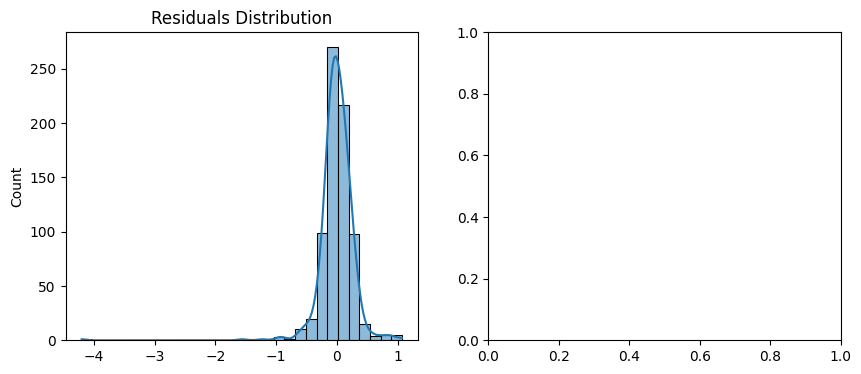

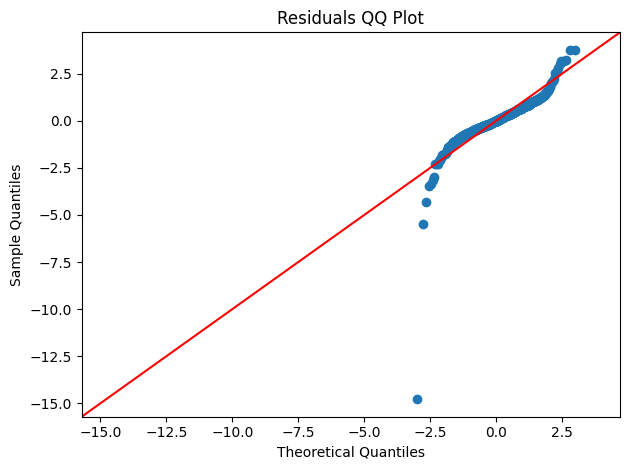

In [ ]:
# MODEL DIAGNOSTICS — RESIDUALS
residuals = ols_model.resid

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Residuals QQ Plot")
plt.tight_layout()
plt.show()

In [ ]:
##DATA-DRIVEN INSIGHTS — RECOMMENDATIONS
# (Interpret significant or non-zero predictors)

insights = {
    "Customer_Segment_Premium": "Premium customers generate higher revenue. Prioritize loyalty and retention programs for this segment.",
    "Customer_Segment_Mid-Tier": "Mid-Tier clients show solid engagement; offer targeted upselling opportunities to move them to Premium.",
    "Referral_Count": "Referrals have a strong positive impact—expand referral incentives to attract high-value customers.",
    "Total_Orders": "Frequent transactions directly drive revenue; introduce point-based rewards for repeat purchases.",
    "Average_Basket_Size": "Larger basket size increases revenue—promote bundles and cross-selling offers.",
    "Time_Spent_on_Site": "Higher engagement time correlates with spending; improve platform experience and personalization.",
    "Churn_Risk_Score": "Negative relationship—develop retention strategies for customers with high churn scores.",
    "Discount_Usage_Rate": "Moderate use of discounts helps conversions; monitor excessive discounts to protect margins."
}

pd.DataFrame.from_dict(insights, orient="index", columns=["Business_Recommendation"])

,Business_Recommendation
Customer_Segment_Premium,Premium customers generate higher revenue. Pri...
Customer_Segment_Mid-Tier,Mid-Tier clients show solid engagement; offer ...
Referral_Count,Referrals have a strong positive impact—expand...
Total_Orders,Frequent transactions directly drive revenue; ...
Average_Basket_Size,Larger basket size increases revenue—promote b...
Time_Spent_on_Site,Higher engagement time correlates with spendin...
Churn_Risk_Score,Negative relationship—develop retention strate...
Discount_Usage_Rate,Moderate use of discounts helps conversions; m...


# Recommendations and Business Solutions

Based on the statistical findings, several data-driven recommendations were developed to address the declining revenue per customer. The results suggest focusing on Premium and Mid-Tier customer segments since they produce the highest revenue, making them ideal targets for loyalty and retention programs. Increasing referral activities is another strategic move, as customers who refer others are proven to spend more and have higher engagement. Additionally, encouraging frequent transactions through incentives, bundles, and cross-selling can raise both the number of orders and average basket size. Improving digital engagement is also essential, as time spent on the site directly correlates with higher spending. Finally, monitoring churn risk and offering targeted promotions to at-risk customers can reduce attrition and sustain long-term profitability.